In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [4]:
# Memuat Dataset
file_path = '/content/heart (2).csv'
data = pd.read_csv(file_path)

In [5]:
# Menampilkan informasi Basic dan mengecek Missing Value
print(data.info())
print("Missing values per column:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              918 non-null    int64  
 1   Sex              918 non-null    object 
 2   ChestPain_Type   918 non-null    object 
 3   Resting_BP       918 non-null    int64  
 4   Cholesterol      918 non-null    int64  
 5   Fasting_BS       918 non-null    int64  
 6   Resting_ECG      918 non-null    object 
 7   MaxHR            918 non-null    int64  
 8   Exercise_Angina  918 non-null    object 
 9   Oldpeak          918 non-null    float64
 10  ST_Slope         918 non-null    object 
 11  HeartDisease     918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
Missing values per column:
 Age                0
Sex                0
ChestPain_Type     0
Resting_BP         0
Cholesterol        0
Fasting_BS         0
Resting_ECG        0
MaxHR   

In [6]:
# Melakukan transform pada variabel kategorikal menjadi numerikal
data_encoded = pd.get_dummies(data, columns=['Sex', 'ChestPain_Type', 'Resting_ECG', 'Exercise_Angina', 'ST_Slope'], drop_first=True)

In [7]:
# Normalisasi variabel numerik jika dibutuhkan
scaler = StandardScaler()
numeric_cols = ['Age', 'Resting_BP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])

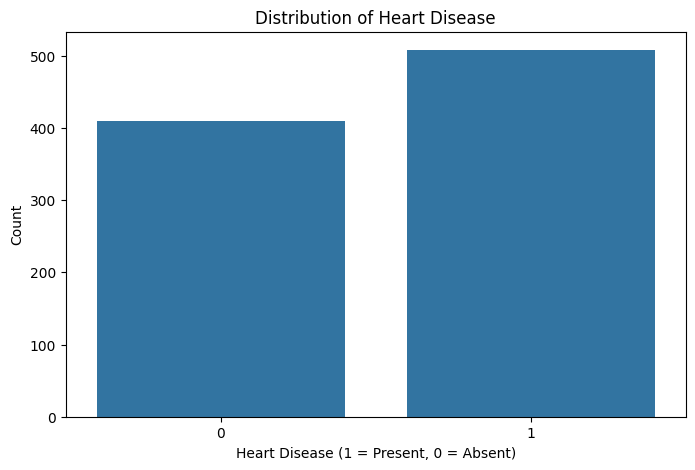

In [8]:
# Visualisasi distribusi HeartDisesase
plt.figure(figsize=(8, 5))
sns.countplot(x='HeartDisease', data=data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1 = Present, 0 = Absent)')
plt.ylabel('Count')
plt.show()

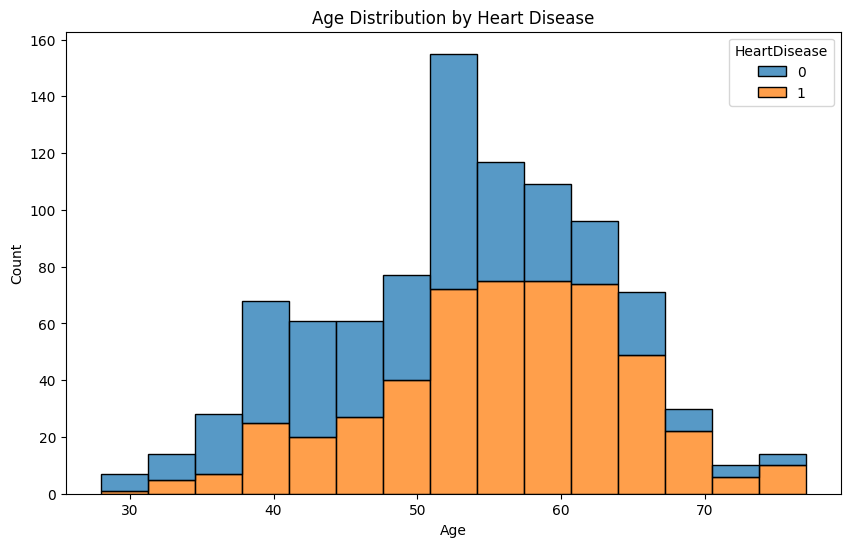

In [9]:
# Visualisasi ditribusi HeartDisease berdasarkan umur
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='HeartDisease', multiple='stack', bins=15)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

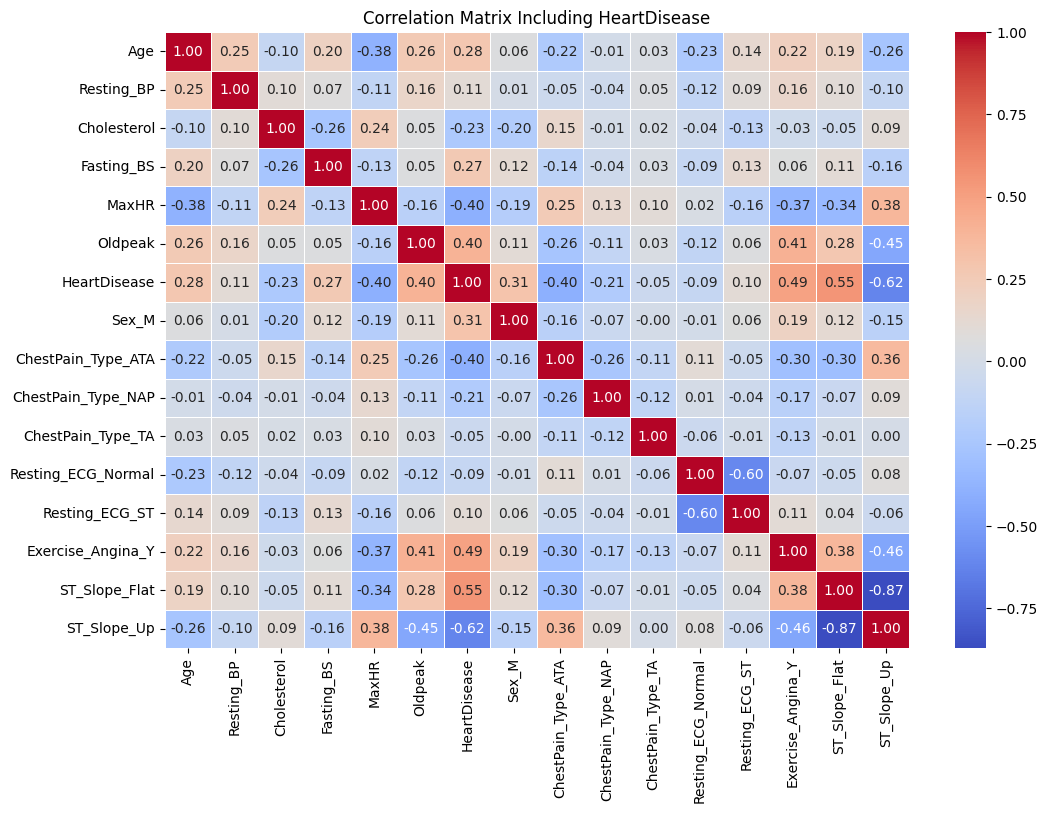

In [10]:
# Visualisasi Korelasi Heatmap
plt.figure(figsize=(12, 8))
correlation = data_encoded.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Including HeartDisease')
plt.show()

In [11]:
# Membagi menjadi variabel fitur dan variabel target
X = data_encoded.drop(columns=['HeartDisease'])
y = data_encoded['HeartDisease']

In [12]:
# Membagi dataset menjadi set Training dan set Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Membangun dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Melakukan Prediksi
y_pred = dt_model.predict(X_test)

In [15]:
# Mengkalkulasi Evaluasi Metriks
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.78
Precision: 0.87
Recall: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       112
           1       0.87      0.73      0.79       164

    accuracy                           0.78       276
   macro avg       0.78      0.79      0.77       276
weighted avg       0.79      0.78      0.78       276



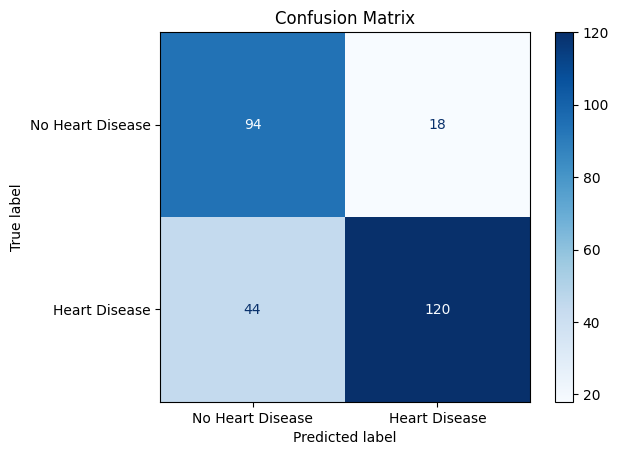

In [16]:
# Visualisasi confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, display_labels=["No Heart Disease", "Heart Disease"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

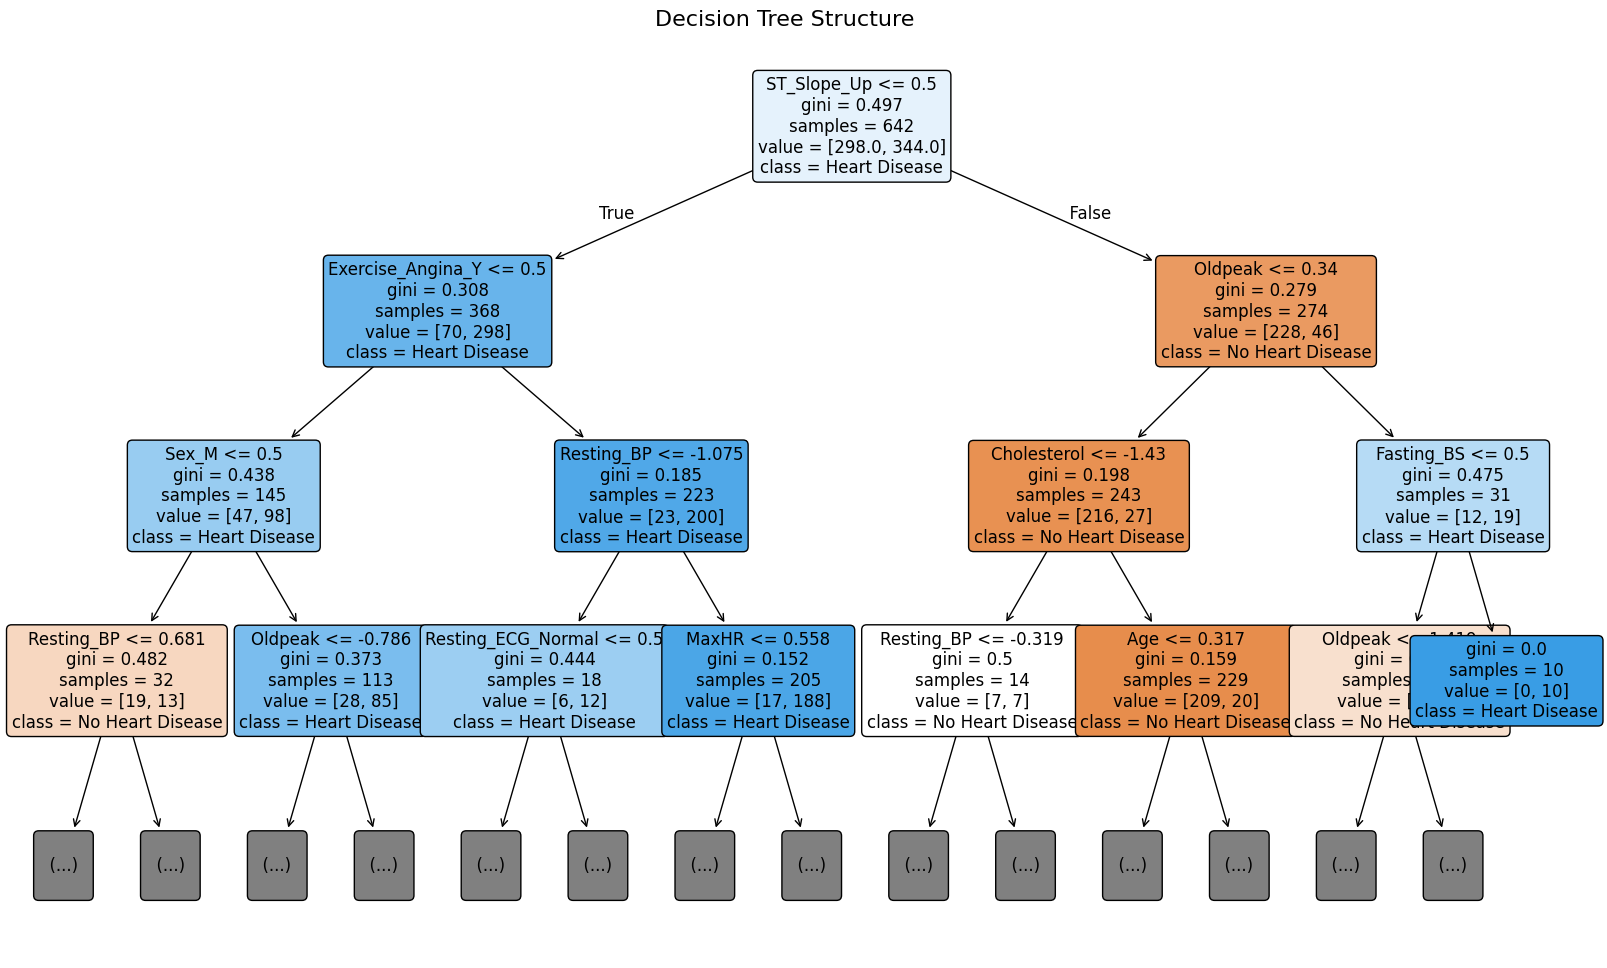

In [17]:
# Visualisasi Decision Tree
plt.figure(figsize=(20, 12))  # Menyesuaikan ukuran gambar agar lebih lebar
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=["No Heart Disease", "Heart Disease"],
          filled=True,
          rounded=True,
          fontsize=12,  # Ukuran font ditingkatkan
          max_depth=3)  # Membatasi kedalaman pohon agar lebih sederhana

plt.title("Decision Tree Structure", fontsize=16)  # Menyesuaikan ukuran judul
plt.show()

In [18]:
# Rincian performa variabel fitur penting
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Feature Importances:")
print(feature_importances.head(10))

Top 10 Feature Importances:
ST_Slope_Up           0.405282
Oldpeak               0.157811
MaxHR                 0.090390
Cholesterol           0.062378
Age                   0.055656
Resting_BP            0.054151
Exercise_Angina_Y     0.041950
Sex_M                 0.028561
ChestPain_Type_NAP    0.027875
Fasting_BS            0.025931
dtype: float64


**Analisis Struktur Decision Tree**

Decision Tree bekerja dengan membagi dataset pada setiap node berdasarkan fitur yang paling informatif. Pada setiap tahap, model memilih fitur yang memberikan informasi maksimum tentang target (HeartDisease) dengan mengukur impurity (misalnya, menggunakan Gini index atau Entropy dalam Information Gain). Proses ini berlanjut hingga kondisi tertentu tercapai, seperti kedalaman maksimum atau jumlah minimum sampel per node, yang menghindari overfitting.

Dalam visualisasi Decision Tree, setiap node menunjukkan:

1.   Fitur yang digunakan untuk pembagian: Fitur dengan korelasi tinggi dengan HeartDisease cenderung dipilih di node atas.
2.   Threshold nilai fitur: Pada node pembagi, decision tree membuat pembagian berdasarkan nilai tertentu dari fitur tersebut.
3.   Jumlah sampel pada node: Jumlah sampel yang sesuai dengan kondisi tersebut.
4.   Prediksi akhir: Prediksi pada node terakhir atau daun, yang biasanya merepresentasikan mayoritas kelas (HeartDisease atau No Heart Disease).